## VARs With Integrated Variables

## Example 15.2

Example13.1对rs和r20进行建模时用了VAR(2)模型，考虑到Example 14.1已经证明了这两个利率是协整的，我们现在考察VECM模型。

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
r20=pd.read_csv("r20.csv").dropna(axis=0,how='any')['r20']
rs=pd.read_csv("rs.csv").dropna(axis=0,how='any')['rs']
spread=[]
for i in range(len(r20)):
    spread.append(r20[i]-rs[i])
#公共函数：差分
def delta_serie(vector):
    ret=[]
    for i in range(1,len(vector)):
        ret.append(vector[i]-vector[i-1])
    return ret
dr20=delta_serie(r20)
drs=delta_serie(rs)

In [5]:
def ARDLpqr_estimation(sample,samplex,samplee,p,q,r):
    if len(sample)!=len(samplex):
        print('Wrong!')
        return
    h=max(p,q,r)
    matrix_x=np.zeros((len(sample)-h,p+q+r+2))  
    array=sample.reshape(len(sample))
    arrayx=samplex.reshape(len(sample))
    arraye=samplee.reshape(len(sample))
    j=0
    for i in range(0,len(sample)-h):
        matrix_x[i,0:p+q+r+2]=np.hstack((array[j:j+p],arrayx[j:j+q+1],arraye[j:j+r+1]))
        j+=1  
    matrix_y=np.array(array[h:len(sample)])
    matrix_y=matrix_y.reshape(len(sample)-h,1)
    #系数的表达式：A=(X^TX)^-1 X^T Y
    coef=np.dot(np.dot(np.linalg.inv(np.dot(matrix_x.T,matrix_x)),matrix_x.T),matrix_y)
    return coef
e=[]
for i in range(len(r20)-1):
    e.append(r20[i]-1.044*rs[i]-0.898)

print(ARDLpqr_estimation(np.array(drs),np.array(dr20),np.array(e),2,1,0))
print(ARDLpqr_estimation(np.array(dr20),np.array(drs),np.array(e),2,1,0))

[[ 0.01161712]
 [ 0.19950639]
 [-0.05317068]
 [ 0.29629252]
 [ 0.02614488]]
[[-0.14211894]
 [ 0.31090991]
 [ 0.02369562]
 [-0.00942894]
 [-0.00361014]]


隐含VECM的ML估计获得结果如下，为方便起见以单独方程式形式编写（与先前的分析一致，由于常数项不显著，因此各个方程式均未包含任何截距，）：

$\Delta RS_t=0.199\Delta RS_{t-1}+0.011\Delta RS_{t-2}+0.296\Delta R20_{t-1}-0.053\Delta R20_{t-2}+0.026e_{t-1}$

$\Delta R20_t=0.310\Delta R20_{t-1}-0.142\Delta R20_{t-2}-0.009\Delta RS_{t-1}+0.023\Delta RS_{t-2}-0.004e_{t-1}$

## Example 15.3

除了规范化$\alpha_2=1$（足以确定示例15.2中的VECM的协整矢量）外，模型的估计系数还提出了另外两个限制。 第一个是$\alpha_1= -1$，因为$\hat{\alpha}$与该值无关紧要。 如例14.2拟合的ARDL模型中所发现的，该限制将误差校正定义为扩展与平衡值之间的偏差。 其次，d_r20公式中的误差校正项与零的差别不大，因此引发了一个问题，即R20是否可能是弱外生的。 用15.15节中的表示，$n1 = n2 = 1$，我们希望检验假设$\beta_2= 0$以建立R20的弱外生性。

In [6]:
def ARDLpq_estimation(sample,samplex,p,q):
    if len(sample)!=len(samplex):
        print('Wrong!')
        return
    h=max(p,q)
    matrix_x=np.zeros((len(sample)-h,p+q+1))  
    array=sample.reshape(len(sample))
    arrayx=samplex.reshape(len(sample))
    j=0
    for i in range(0,len(sample)-h):
        matrix_x[i,0:p+q+1]=np.hstack((array[j:j+p],arrayx[j:j+q+1]))
        j+=1  
    matrix_y=np.array(array[h:len(sample)])
    matrix_y=matrix_y.reshape(len(sample)-h,1)
    #系数的表达式：A=(X^TX)^-1 X^T Y
    coef=np.dot(np.dot(np.linalg.inv(np.dot(matrix_x.T,matrix_x)),matrix_x.T),matrix_y)
    return coef


def ARDLpqr_estimation(sample,samplex,samplee,p,q,r):
    if len(sample)!=len(samplex):
        print('Wrong!')
        return
    h=max(p,q,r)
    matrix_x=np.zeros((len(sample)-h,p+q+r+2))  
    array=sample.reshape(len(sample))
    arrayx=samplex.reshape(len(sample))
    arraye=samplee.reshape(len(sample))
    j=0
    for i in range(0,len(sample)-h):
        matrix_x[i,0:p+q+r+2]=np.hstack((array[j:j+p],arrayx[j:j+q+1],arraye[j:j+r+1]))
        j+=1  
    matrix_y=np.array(array[h:len(sample)])
    matrix_y=matrix_y.reshape(len(sample)-h,1)
    #系数的表达式：A=(X^TX)^-1 X^T Y
    coef=np.dot(np.dot(np.linalg.inv(np.dot(matrix_x.T,matrix_x)),matrix_x.T),matrix_y)
    return coef
eR=[]
for i in range(len(r20)-1):
    eR.append(r20[i]-rs[i]-1.191)
    
print(ARDLpqr_estimation(np.array(drs),np.array(dr20),np.array(eR),2,1,0))
print(ARDLpq_estimation(np.array(dr20),np.array(drs),2,1))

[[ 0.0118096 ]
 [ 0.20000173]
 [-0.05327599]
 [ 0.29646352]
 [ 0.02675206]]
[[-0.14024634]
 [ 0.31332406]
 [ 0.0223528 ]
 [-0.01194279]]


得到：

$\Delta RS_t=0.200\Delta RS_{t-1}+0.011\Delta RS_{t-2}+0.296\Delta R20_{t-1}-0.053\Delta R20_{t-2}+0.027e^R_{t}$

$\Delta R20_t=0.313\Delta R20_{t-1}-0.140\Delta R20_{t-2}-0.011\Delta RS_{t-1}+0.022\Delta RS_{t-2}$

注意，$\phi_{1,21}$和^$\phi_{2,21}$都与零无显着差异，因此R20实际上可以被认为是强烈外生的，没有从短速率到长速率的反馈。

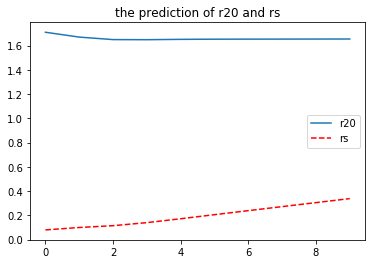

In [10]:
drsc=[]
for i in range(len(drs)):
    drsc.append(drs[i])
dr20c=[]
for i in range(len(drs)):
    dr20c.append(dr20[i])
for i in range(0,10):
    drsc.append(0.2*drsc[len(drsc)-1]+0.011*drsc[len(drsc)-2]+0.296*dr20c[len(dr20c)-1]-0.053*dr20c[len(dr20c)-2]+0.026)
    dr20c.append(0.313*dr20c[len(dr20c)-1]-0.140*dr20c[len(dr20c)-2]-0.011*drsc[len(drsc)-1]+0.022*drsc[len(drsc)-2])
rsf=drsc[-11:-1]
r20f=dr20c[-11:-1]
#预测结果序列
r20P=[r20[785]]
rsP=[rs[785]]
for i in range(1,10):
    r20P.append(r20P[i-1]+r20f[i-1])
    rsP.append(rsP[i-1]+rsf[i-1])
plt.plot(r20P,label='r20')
plt.plot(rsP,'r--',label='rs')
plt.legend()
plt.title("the prediction of r20 and rs")
plt.show()

利率的未来价值的预测可以按照第7章，使用单变量模型进行预测的介绍中所述的方式，逐个方程式地获得。 图15.1显示了R20和RS到2020年底的预测。预测显示迅速稳定，在预测期末分别为1.694％和0.426％，这两个比率之差为1.268％， 接近点差的平衡值。

## Example 15.7

VECM-X模型具有一些有趣的含义。 总辐射强迫对温度没有短期影响：整个影响是通过滞后的误差校正项来实现的，因此，是驱使温度变化的最后一个时期与长期平衡的偏差。 毫不奇怪，外源气候变量对总辐射强迫没有影响，温度也没有任何短期反馈。 但是，由于存在滞后误差校正，因此存在从温度到总辐射强迫的长期反馈。 纠错项的符号均为负，因此系统处于稳定的平衡状态。

In [8]:
# 读入数据
amo=np.read_csv("amo.csv")['amo']
soi=np.read_csv("soi.csv")['soi']
temp=np.read_csv("temp.csv")['temp']
trf=np.read_csv("trf.csv")['trf']
volc=np.read_csv("volc.csv")['volc']
dtemp=delta_serie(temp)
dtrf=delta_serie(trf)
e=[]
def ARDLpq_estimation(sample,samplex,p,q):
    if len(sample)!=len(samplex):
        print('Wrong!')
        return
    h=max(p,q)
    matrix_x=np.zeros((len(sample)-h,p+q+2))  
    array=sample.reshape(len(sample))
    arrayx=samplex.reshape(len(sample))
    j=0
    for i in range(0,len(sample)-h):
        matrix_x[i,0:p+q+2]=np.hstack(([1],array[j:j+p],arrayx[j:j+q+1]))
        j+=1  
    matrix_y=np.array(array[h:len(sample)])
    matrix_y=matrix_y.reshape(len(sample)-h,1)
    #系数的表达式：A=(X^TX)^-1 X^T Y
    coef=np.dot(np.dot(np.linalg.inv(np.dot(matrix_x.T,matrix_x)),matrix_x.T),matrix_y)
    return coef

print('temp和trf间的最小二乘法参数：',ARDLpq_estimation(np.array(temp),np.array(trf),0,0))
#序列e通过最小二乘法拟合temp和trf得到
for i in range(len(temp)-1):
    e.append(temp[i]-0.015-0.000094*(i+1)-0.418*trf[i])

temp和trf间的最小二乘法参数： [[-0.1074766 ]
 [ 0.42201734]]


In [9]:
def ARDLpqabc_estimation(sample,samplex1,samplex2,samplex3,samplex4,p,q,a,b,c):
    h=max(p,q,a,b,c)
    matrix_x=np.zeros((len(sample)-h,p+q+a+b+c+5))  
    array=sample.reshape(len(sample))
    arrayx1=samplex1.reshape(len(sample))
    arrayx2=samplex2.reshape(len(samplex2))
    arrayx3=samplex3.reshape(len(samplex3))
    arrayx4=samplex4.reshape(len(samplex4))
    j=0
    for i in range(0,len(sample)-h):
        matrix_x[i,0:p+q+a+b+c+5]=np.hstack(([1],array[j:j+p],arrayx1[j:j+q+1],arrayx2[j:j+a+1],arrayx3[j:j+b+1],arrayx4[j:j+c+1]))
        j+=1  
    matrix_y=np.array(array[h:len(sample)])
    matrix_y=matrix_y.reshape(len(sample)-h,1)
    #系数的表达式：A=(X^TX)^-1 X^T Y
    coef=np.dot(np.dot(np.linalg.inv(np.dot(matrix_x.T,matrix_x)),matrix_x.T),matrix_y)
    return coef
volc.pop(-1)
soi.pop(-1)
amo.pop(-1)
print(ARDLpqabc_estimation(np.array(dtemp),np.array(volc),np.array(soi),np.array(amo),np.array(e),3,0,0,0,0))
print(ARDLpq_estimation(np.array(dtrf),np.array(e),4,0))

[[-3.19425991e-02]
 [-5.24042475e-01]
 [-5.65829884e-01]
 [-4.64368616e-01]
 [ 3.92272201e-04]
 [-1.80970313e-04]
 [ 2.46211436e-02]
 [-3.75524696e-01]]
[[ 0.00372372]
 [-0.3641138 ]
 [ 0.75005306]
 [-1.37495734]
 [ 1.62661727]
 [-0.01269778]]


忽略<0.0001的系数后得到的估计结果：

$\Delta TEMP_t=-0.03-0.464TEMP_{t-1}-0.565TEMP_{t-2}-0.524TEMP_{t-3}+0.246AMO_{t}-0.375e_{t-1}$

$\Delta TRF_t=0.003+1.626\Delta TRF_{t-1}-1.375TRF_{t-2}+0.750TRF_{t-3}-0.364TRF_{t-4}-0.012e_{t-1}$